# Overview
## 배경
* Covid-19의 확산으로 감염 확산 방지를 위해 마스크 착용이 의무화
    * 따라서 공공 장소에 있는 사람들은 반드시 마스크를 착용해야 할 필요가 있음.
    * 또 코와 입을 완전히 가릴 수 있도록 올바르게 착용하는 것이 중요
* 하지만 넓은 공공장소에서 모든 사람들의 올바른 마스크 착용 상태를 검사하기 위해선 추가 인적 자원이 필요
   * 따라서 사람 얼굴 이미지 만으로 이 사람이 마스크를 쓰고 있는지, 정확히 쓴 것이 맞는지 자동으로 가려낼 시스템을 만들어 내 보려고 함
   
## 평가 방법
### 제출
* 방법
    * 노트북: https://nbviewer.org/gist/MoMentum99/0b01597b72e008646b4d3bef50c55bed/sample_submission.ipynb
    * inference.py:
        * 파일의 실행 형식은 다음과 같습니다
            ```SM_CHANNEL_EVAL=[dataset dir] SM_CHANNEL_MODEL=[model saved dir] SM_OUTPUT_DATA_DIR=[inference output dir] python inference.py --model [your model class]```

            * SM_CHANNEL_EVAL: 평가 데이터셋이 위치하는 폴더

            * SM_CHANNEL_MODEL: 학습된 모델(best.pth) 가 위치하는 폴더

            * SM_OUTPUT_DATA_DIR: 모델의 예측값을 csv 파일로 저장하는 폴더

            * (optional) model: Custom Model 를 통해 학습을 진행하였을 경우, 해당 모델의 이름

        * 위 형식으로 실행하면 SM_OUTPUT_DATA_DIR 폴더에 테스트 셋의 예측값이 submission.csv 이름으로 저장이 됩니다
        
* 제출 형식(submission.csv)
    ```
    ImageID,ans
    a41280fcf20d5bb68550876c36b63e9d030b2324.jpg,0
    2b721e63790fd041b5440f05647afc9266fa05bd.jpg,0
    3931a1e7ee6fd45f313436ab68d0f556a25e4d25.jpg,0
    4b30021def42c080bb7744d15b50b3a381d9cb4f.jpg,0
    b57eca823bdbf49272c75354bf0e0d3d8fc119d7.jpg,0
    075bbf401dd04ad6154bc508875d8910e08116e8.jpg,0
    f740f5a296b8d5331ae47907bd51126bb0e70697.jpg,0
    c90c83435d9c8c3f1fdc3ee6c7f65478f72f4967.jpg,0
    b7e19ad2552e1f27a4b2c8a93c1284bfa2d5176e.jpg,0
    b5930a21e7a24290cbf63cc93798705cfce09d16.jpg,0
    b862db486a2f118412858a1369ef30b14b90cbee.jpg,0
    d80bd7fff0e6bfc64092fac7a20c14ecdb8fda3f.jpg,0
    ...
    ```
    * ImageID, ans 형식으로 헤더 포함
    
### 평가
* f1 score를 통해 평가
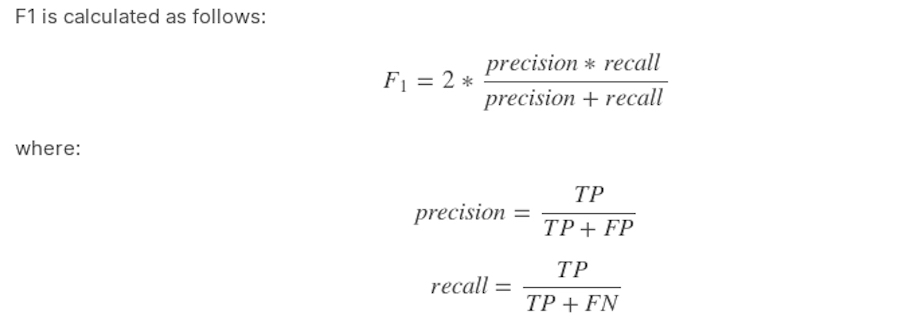

# 데이터
## 학습 데이터셋
* 구성
    * 아시안, 남녀, 20대 ~ 70대
* 통계
    * 전체 사람 명수: 4,500
    * 한 사람 당 사진 개수: 7
        * 마스크 착용 5장, 올바르게 착용하지 않은 경우 1장, 미착용 1장
    * 이미지 크기: (384, 512)
    * 전체 데이터셋의 60%가 학습 데이터셋으로 활용
* 클래스: 총 18개의 클래스
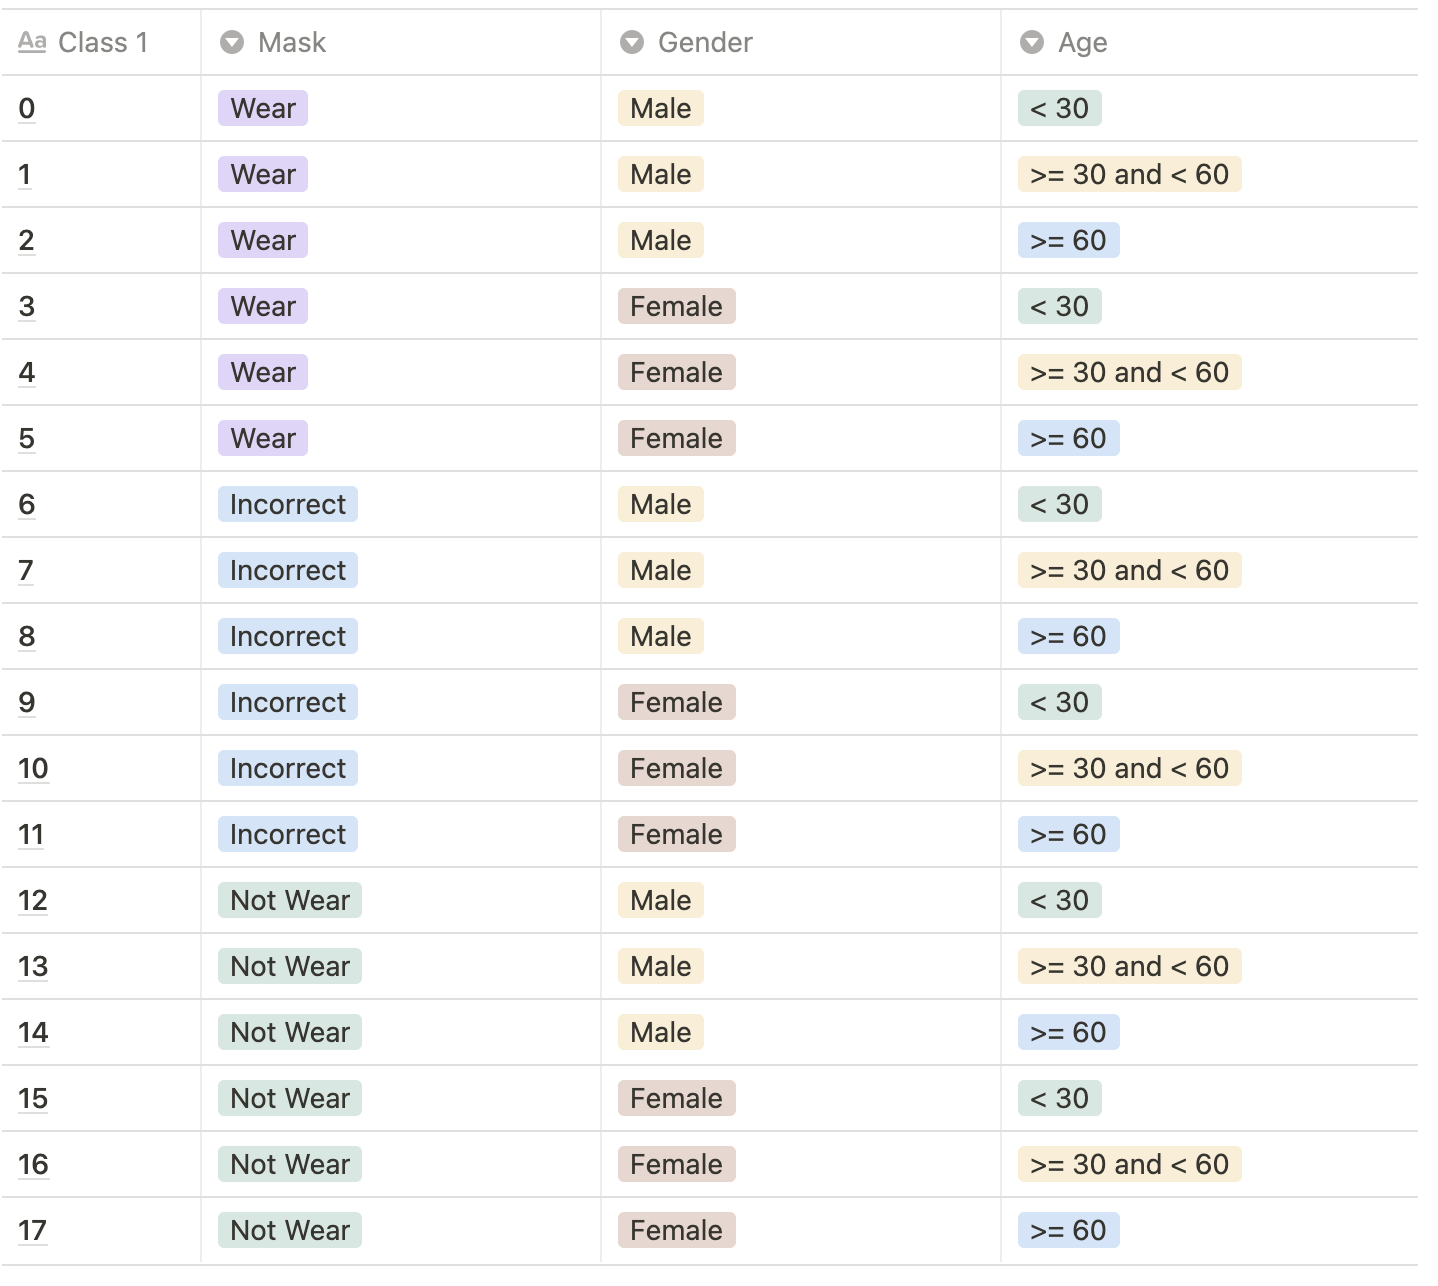

## 평가 데이터셋
* 나머지 40%개의 데이터셋 중
    * 20%: public 테스트셋
    * 20%: private 테스트셋
* 최종 순위는 private 테스트셋을 통해 산출한 점수로 확정

## 데이터 구조


In [26]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [27]:
list_files('./data')

data/
    .DS_Store
    train/
        .DS_Store
        train.csv
        images/
            .DS_Store
            003106_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001476_male_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001334_female_Asian_24/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006200_male_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
             

                mask3.jpg
            000807_male_Asian_59/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006451_female_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003577_male_Asian_60/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003062_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            000572_female_Asian_57/
                incorrect_mask

                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006952_male_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001317_female_Asian_25/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001108_female_Asian_23/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006214_male_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
             

                mask2.jpg
                mask3.jpg
            006941_male_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003364_female_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            004469_male_Asian_25/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003084_female_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001181_male_Asian_22/
      

            000675_female_Asian_59/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            000207_female_Asian_56/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001256_female_Asian_24/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001005_male_Asian_24/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            005082_male_Asian_48/
                incorrect_mask.jpg
                mask4

            003735_male_Asian_60/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003672_male_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003373_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            000663_female_Asian_57/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001554_female_Asian_27/
                incorrect_mask.jpg
                mask4

            001422_male_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001581_female_Asian_60/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001142_female_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006418_female_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006483_female_Asian_18/
                incorrect_mask.jpg
                mas

            000356_female_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003234_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006433_female_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            005287_male_Asian_22/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            005543_female_Asian_30/
                incorrect_mask.jpg
                mas

            005240_male_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001040_male_Asian_30/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003038_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001015_female_Asian_22/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003355_female_Asian_19/
                incorrect_mask.jpg
                mask4

            006724_male_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003339_female_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            005276_male_Asian_24/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003130_female_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            000699_female_Asian_57/
                incorrect_mask.jpg
                mask4

            003742_female_Asian_60/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006245_male_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            004455_female_Asian_55/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            004424_male_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006660_male_Asian_19/
                incorrect_mask.jpg
                mask4.j

                mask2.jpg
                mask3.jpg
            004201_female_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003859_male_Asian_60/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006154_male_Asian_20/
                incorrect_mask.png
                mask4.png
                mask5.png
                mask1.png
                mask2.png
                normal.png
                mask3.png
            000533_female_Asian_54/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006554_female_Asian_20/
    

                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001156_female_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            000260_female_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006653_male_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            003120_female_Asian_19/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
            

            000243_female_Asian_58/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            004354_male_Asian_60/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006469_female_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001110_male_Asian_25/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            005105_male_Asian_33/
                incorrect_mask.jpg
                mask4.j

            003299_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            001149_female_Asian_20/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            005524_female_Asian_38/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            006405_female_Asian_18/
                incorrect_mask.jpg
                mask4.jpg
                mask5.jpg
                mask1.jpg
                normal.jpg
                mask2.jpg
                mask3.jpg
            000248_female_Asian_54/
                incorrect_mask.jpg
                m

        images/
            c492380e66527078a81324ea8a0975fce42ea2b1.jpg
            760eacb6442f328640c6abf07d9b78565306bdef.jpg
            18d44557e52c8b584ebe279447bb7675fb6454ac.jpg
            ba20e0341900317ead9000456e31cf9134277355.jpg
            1daa237c2151f305de3008cabd17905cbfcda201.jpg
            0bbabbcd6558ef901f4d53f278edbcc5d91a0307.jpg
            753aa94f736e7989f5d91a3baa54345fa825a8c8.jpg
            008f598f7d1c712498e2ee358e50dda6ea04cc12.jpg
            bdc831f7b41df698a7081eeb11954b1c894988de.jpg
            802bd6f152483a5b8fce0c25a712b5a5517b88dd.jpg
            24283ac695b19b5c91d0c564ab98766753a6f2a9.jpg
            09fd5eb3810745f1b1ef83c3f196e530c2ebc755.jpg
            f83c24436967bebcfe3edca6fdb02a93fc80a739.jpg
            76e1770bf255a378abed5ebac3834ff012c2c7af.jpg
            48c06f1919853d7f0b4a1caa644d357e9a2bf043.jpg
            cf26b7d91045d6a1acebbd37a092f6385d9f8545.jpg
            7e3ed04e4d3460be36c9fa58c781e08045f5093e.jpg
            c9d

            1a166ad1f3be13b15835a136cb9505a8a47106a6.jpg
            0f7929eac9e46c655e2cbcd1c1b01e26791c419c.jpg
            b85a6fb411630680e8fe5551541b0de6c8d93e84.jpg
            c7282230b4e019fc774d7e4c369233eab2097dd1.jpg
            c1839d3291033154d1b11529a3bf316eb4c75399.jpg
            912065923c775389d8f53f0cada69af0c6625684.jpg
            e196b27bce1808c6ac3f5b502ed3fabac5659a00.jpg
            f39f7a104de11fc9d124e9f4bfe0685a8a4a6947.jpg
            fe6f98f16a4b6377334d67427e4ad1c9a8c7fcc4.jpg
            6559284e80199247b54f8f5b9ab73c321220ab45.jpg
            e878464c299d1990eed30c7bfeaccd36ebf3f0e9.jpg
            bc721f3a9906e17d8822078e20faf44cf915d068.jpg
            a2bd90aabbdcb03f7085514a5e02c2757df6fb91.jpg
            97b8a874b1d550689d85d1b0f7afa0d5f9344e9e.jpg
            11c9d7065a7b7908f9684f0598154a69ab13c41d.jpg
            4b00cbb632aaa7fde68d25ab32655ee56786907c.jpg
            d669e158522a995119d13af268e237cf5bcb7a32.jpg
            b7d74865cfe0308d6ee

            7f657c010b54d736a8269212dcf24f51e798966e.jpg
            9a82f986365a61b1d1904ea09af214793d82bae4.jpg
            5762d7d0110c707228306302c25c4bbe8e6deb1e.jpg
            0da2dac9da3f797adfbdeaed999d54935a0a1020.jpg
            3872d2dbf8554c945abaad87a735376825034c12.jpg
            d062b6384301848a0df95c628bc0aa5d96505a4f.jpg
            3e7d494a3d235a62c78d38595e86fabd38f9e56b.jpg
            161071cb92681d112e56324da8aba6a0a8bfc8e3.jpg
            b79de0a6661ce391637a1ab43645eca21fc99ad9.jpg
            a77bea908bec8edc7873520bb823036a13114c59.jpg
            12d78d0607459b131f54c952d235a960a9505768.jpg
            fcd343341f9a61b3713060c73b8008fe2aa39247.jpg
            908beb686b8e4d30bdc1df69d63930af9b376ae2.jpg
            e5d6e21c30b188e2c06611827c351db5b39bc119.jpg
            b6cb80b465c7ede39c404b0f81545f192e4429cf.jpg
            0d8650981577e71251306e63eec903c9fdb99f98.jpg
            4144e1f0c384008abc5a4cdbded8101e96553c78.jpg
            becca18fcbbc75bdeee

            3ccc56ef0e3cd6be1806c709a90a416db2492dd0.jpg
            cd25a4bb581c9cf04f0477a6312702c7a35e38e9.jpg
            0c75e40d1ee651d639ce25807a7703600aba1363.jpg
            aef3efe9831d8a37804a7e12610ac16dc2a64b0f.jpg
            9378325451fc7faa4051dbda159c1853308f57ea.jpg
            708d472df54a9f6230661cf69c1c3cd405baa98d.jpg
            7c1d7dffb5eb4219e6e425de35727c03d871f0d0.jpg
            6dcdb0bf580c16905f4b51b7658c3fc9aaf9f645.jpg
            a905ad1b8489100eadce6559b4d89550bd587324.jpg
            3def8a718b69587c5e346150ad7f79e985569646.jpg
            09f03d324b7351ff9f9adc16d666b61b0df3ef43.jpg
            8b543a30bd6cb40165c4d966c716f9bfb756238c.jpg
            0d0fec395b299666b4c2986067d3a295d766a1aa.jpg
            126446a85104020d02d3098574e6b915e9fe6156.jpg
            1bc134ad663988d6563bbf8e1e0c17fc105c275f.jpg
            d7f6fca51fa06a02a212e25ce0189daca6339d30.jpg
            0141f31e7cedc99f8598ea2e46ec961039aceaee.jpg
            9cf728e801ade8dcbaf

            ea53165a03a9a4ac39f3a59c6fca26bccd409837.jpg
            605942c5ce63dcbabbb039f4dc8dfb13665f671c.jpg
            a90ebd3ad14edf8a7d9b2547d9e0e9e71e09ddcb.jpg
            f87b29ae4f6e68bcf1cce96d3ac23d25114287e1.jpg
            050d87f6458ddf7f48711142a4dab31467e91a97.jpg
            bc2ac641f3ca7ff36c99d79201066437f3ad5c3c.jpg
            3da8a4174fb47cb0c5404bdad4dfb175fda46e7d.jpg
            7d4f193ce5de0128ba79ab2d467d1533ad83e8b2.jpg
            791dc20ad3415609ec8d0a37db0f9a50b61636b8.jpg
            197fdb1e4e720e2b07315183c021551f5842c180.jpg
            96a7f0775270f8a1dedc4f931606a37c8989cb5b.jpg
            e54e4f05d728bea739a8db8db8389d314642c297.jpg
            a0d0d05e891b3e17a740536386b844d4c5731689.jpg
            629802051a045f8343092b42f97a573ec59939f9.jpg
            6867e0efdb6a7fce1ef827b83999514bca1d55da.jpg
            9e39428023b9d8d0d6d149ef11bdb03d9d1faaa6.jpg
            bb56084726c16c9e5c51924b25752f1441f4655d.jpg
            bbbd7129b876dbe9409

            610453b9f9ee69d49bba896ac2d456553a852ef6.jpg
            a41ff5e3d6647b0d2a50fe4b16f949fe2d1d0377.jpg
            cca5b2d9d2a2e9af15b33534618478c13adcba50.jpg
            67dc6aa9622a84b9ead44c4b5cd384d87633ecf5.jpg
            167d76a1a8adecfee488e6d230f9325c07f8b5ef.jpg
            fb6822c99ee8a8c84b262f8dc78f076f75fc2ee0.jpg
            27d9c16da7de509162d9f99c714cf8b1ee8b2e54.jpg
            2caaac495ec51f929b1fcce4594eb6092d3c3512.jpg
            114d341866d23996857698f4b850a44ebd44d5e1.jpg
            635cabf54f29fa60d355461ef570cca6a972062e.jpg
            ea1d23961fb9b5e15e7359bcbbb08fcc903642ac.jpg
            263ea4f5267b7a6b47a4e7a8392ec9500bba5e91.jpg
            c60cd6d8ff98bee979262b6ee3dc4580910a33d5.jpg
            62f377ca3da4980ffcead3f3e7ed0423ddbee5c0.jpg
            73d70321235e81e34d29051da8a3858cf73af64e.jpg
            ac751c04d9e7926405d9cc3bbc13902130b4b767.jpg
            b9629dc158e6bbeb529cf6904f86cbbf33a7ddb1.jpg
            dc3faa317bb618530b3

            14a2e2688471cb45b9c08d2e3ddea648889d5c88.jpg
            e3752bca37a8b07b46629e68c19e5de45aff4b01.jpg
            de7730e2801a93444ea9fefc61bf833b4d88f5a5.jpg
            cc389ca6eb1b90377b2210eab72503d20a7100e8.jpg
            0e1494cbf75ec11f37d824513163eb504229a4ab.jpg
            0dc8fbe0d275dee2ef62f3ca600b7a60a2426663.jpg
            f60313505147ed3e7b9ab20fb1573d2c58a4d516.jpg
            98667162160224e8b6ecdfb7c094409ae7eac5f3.jpg
            2bcdddeadf8ff3fa40d2f4e9c17fcb335515efe5.jpg
            432c5a071fa62bd60dcb23b171c770871989e464.jpg
            af0547757bb5af75354a5f0b46885b84406455d9.jpg
            fe18c30fe8f50c125d02594d5fc901c05c36ddf2.jpg
            32b603a396314194bd293934fc76bb6c2bcfbfdb.jpg
            0a78c0d8d0fbf3cb80e8e126f898e3209f5f86ec.jpg
            2b8d5163f5e28b1f43d70ac0489d9a1cde5b2e01.jpg
            27c4a4ff44d1dc7ae3b82aa39074d3effae242b2.jpg
            3d623fa7c74c1613a4b0daba867cfc31b62a0483.jpg
            a00624b009fd5a1812c

* mask1 ~ mask5: 마스크 착용
* normal: 마스크 미착용
* incorrect_mask: 마스크 올바르게 착용하지 않은 경우

# EDA

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os, sys
import skimage.io
from skimage.transform import resize
#!pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio
#!pip install --no-dependencies imgaug
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import f1_score, fbeta_score
from sklearn.model_selection import train_test_split

WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000 # use 1000 when you just want to explore new idea, use -1 for full train

## 사진 확인

CPU times: user 18 s, sys: 992 ms, total: 19 s
Wall time: 20 s


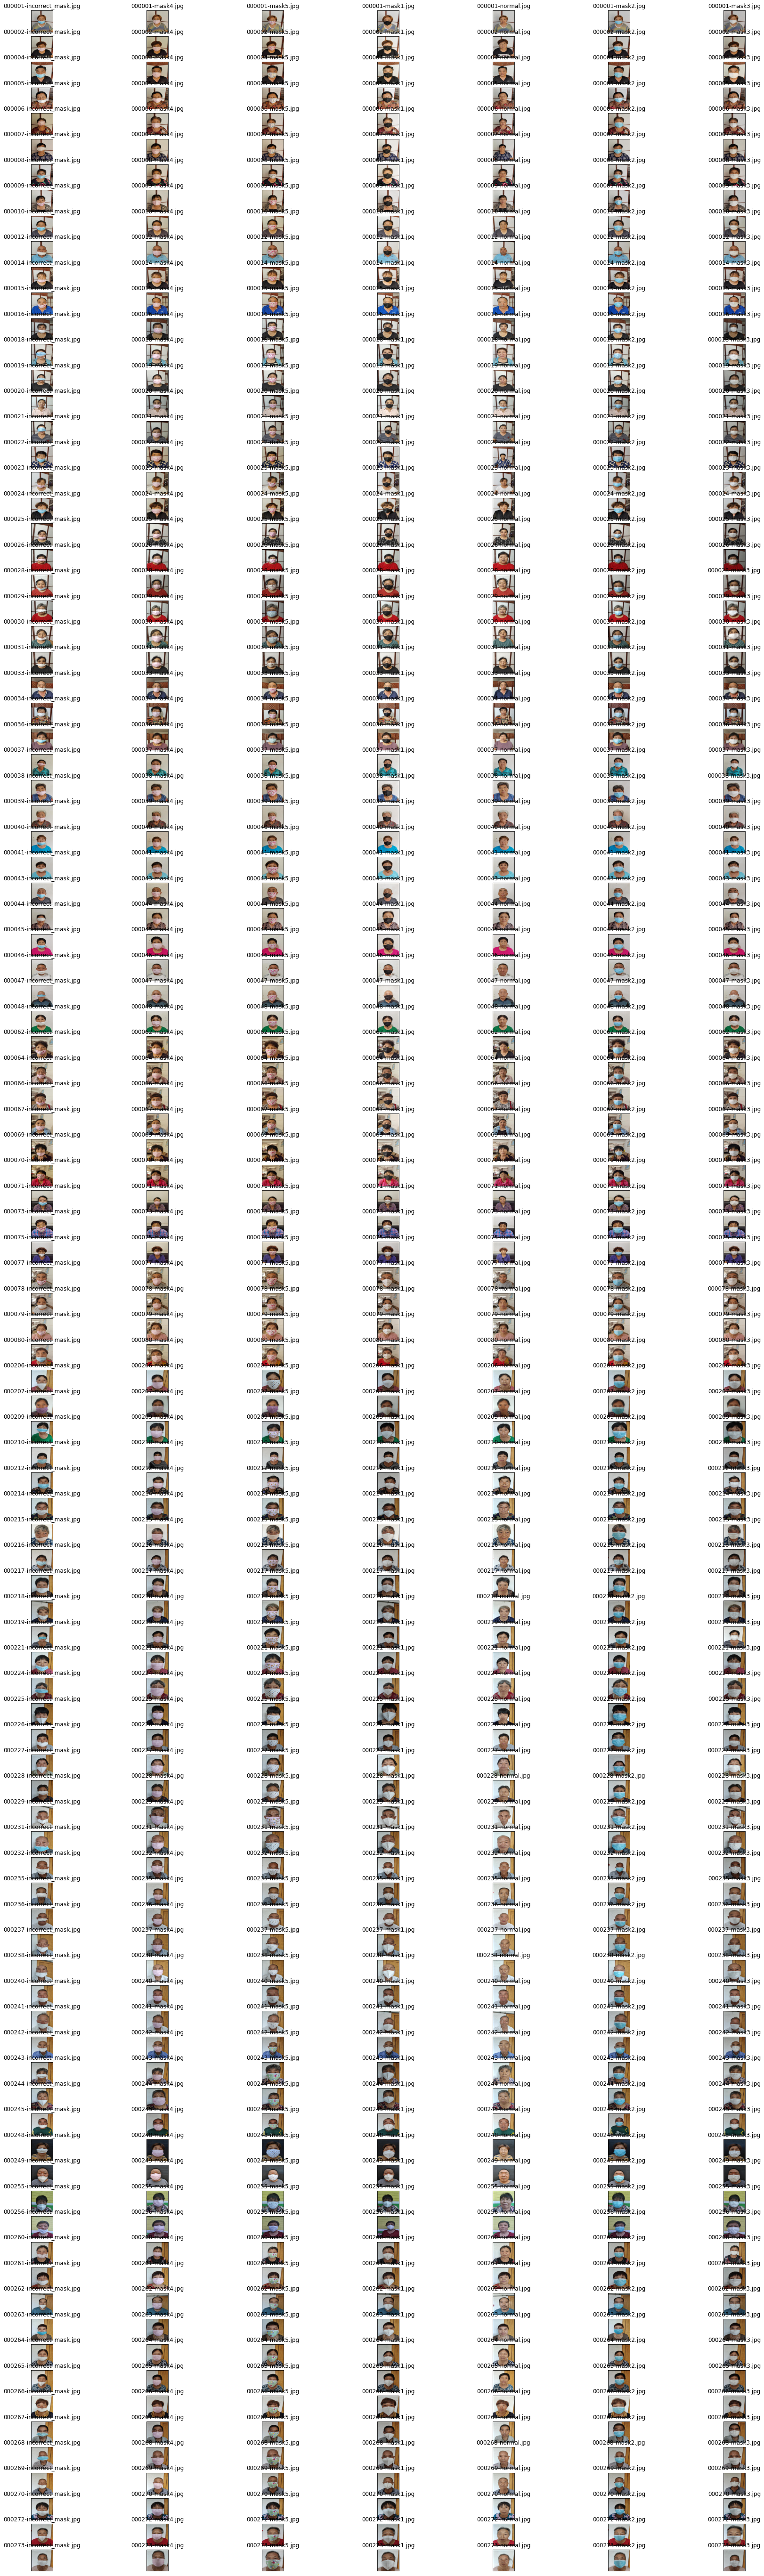

In [159]:
%%time
fig = plt.figure(figsize=(30, 100))

# display 10 images from each class
for i in range(100):
    row = df_train.loc[i]
    path=f"./data/train/images/{row['path']}"
    folders = os.listdir(path)
    for j, img in enumerate(folders):
        ax = fig.add_subplot(100, 7, i * 7 + j + 1, xticks=[], yticks=[])
        image = cv2.imread(path + "/" + img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('%s-%s' % (row['id'], img))
        

# 폴더로 구성되어 있는 이미지 한 폴더로 넣어주기
    * 003106_female_Asian_20+incorrect_mask.jpg
    * 003106_female_Asian_20+mask1.jpg
    * 003106_female_Asian_20+mask2.jpg
    * 003106_female_Asian_20+mask3.jpg
    * 003106_female_Asian_20+mask4.jpg
    * 003106_female_Asian_20+mask5.jpg
    * 003106_female_Asian_20+normal.jpg


In [9]:
df_train = pd.read_csv('./data/train/train.csv')

In [10]:
df_train.head()

id  gender   race  age                    path
0  000001  female  Asian   45  000001_female_Asian_45
1  000002  female  Asian   52  000002_female_Asian_52
2  000004    male  Asian   54    000004_male_Asian_54
3  000005  female  Asian   58  000005_female_Asian_58
4  000006  female  Asian   59  000006_female_Asian_59

In [128]:
df_train_class = pd.DataFrame(columns = ['id', 'per_id', 'gender', 'age', 'mask', 'class', 'path'])
df_train_class.set_index('id', inplace=True)

In [117]:
def return_class(row, mask):
    if mask == 0: # incorrect(6 ~ 11)
        if row['gender'] == 'male':
            if row['age'] < 30:
                num = 6
            elif row['age'] >= 30 and row['age'] < 60:
                num = 7
            else:
                num = 8
        else: 
            if row['age'] < 30:
                num = 9
            elif row['age'] >= 30 and row['age'] < 60:
                num = 10
            else:
                num = 11
    elif mask == 1: # not wear(12 ~ 17)
        if row['gender'] == 'male':
            if row['age'] < 30:
                num = 12
            elif row['age'] >= 30 and row['age'] < 60:
                num = 13
            else:
                num = 14
        else: 
            if row['age'] < 30:
                num = 15
            elif row['age'] >= 30 and row['age'] < 60:
                num = 16
            else:
                num = 17
    else: # wear (0 - 5)
        if row['gender'] == 'male':
            if row['age'] < 30:
                num = 0
            elif row['age'] >= 30 and row['age'] < 60:
                num = 1
            else:
                num = 2
        else: 
            if row['age'] < 30:
                num = 3
            elif row['age'] >= 30 and row['age'] < 60:
                num = 4
            else:
                num = 5
                
    return num

In [133]:
path = './data/train/images'

!rm -rf ./data/train/.DS_Store
!rm -rf ./data/train/images/.DS_Store
folders = sorted(os.listdir(path))

In [134]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,
                                                      stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

['000001_female_Asian_45',
 '000002_female_Asian_52',
 '000004_male_Asian_54',
 '000005_female_Asian_58',
 '000006_female_Asian_59',
 '000007_female_Asian_58',
 '000008_female_Asian_58',
 '000009_female_Asian_56',
 '000010_female_Asian_58',
 '000012_male_Asian_57',
 '000014_female_Asian_58',
 '000015_male_Asian_55',
 '000016_female_Asian_58',
 '000018_female_Asian_59',
 '000019_female_Asian_57',
 '000020_female_Asian_50',
 '000021_female_Asian_54',
 '000022_female_Asian_58',
 '000023_female_Asian_55',
 '000024_female_Asian_58',
 '000025_female_Asian_49',
 '000026_female_Asian_56',
 '000028_female_Asian_58',
 '000029_female_Asian_58',
 '000030_female_Asian_55',
 '000031_female_Asian_54',
 '000033_male_Asian_57',
 '000034_female_Asian_55',
 '000036_female_Asian_58',
 '000037_female_Asian_58',
 '000038_female_Asian_58',
 '000039_female_Asian_57',
 '000040_female_Asian_57',
 '000041_female_Asian_58',
 '000043_male_Asian_56',
 '000044_female_Asian_58',
 '000045_female_Asian_56',
 '000046_ma

In [ ]:
idx = 0
mask_dict = {0: 'incorrect', 1: 'not wear', 2: 'wear'}
for i in df_train.index:
    row = df_train.loc[i]
    imgs_path = os.path.join(path, row['path'])
    print(imgs_path)
    images = sorted(os.listdir(imgs_path))
    for img in images:
        #print(img)
        if img[:-4] == 'incorrect_mask':
            mask = 0 # incorrect
        elif img[:-4] == 'normal':
            mask = 1 # not wear
        else:
            mask = 2 # wear

        classnum = return_class(row, mask)

        df_train_class.loc[idx] = [row['id'], row['gender'], row['age'], mask_dict[mask], classnum, os.path.join(imgs_path, img)]
        idx += 1


In [136]:
df_train_class

per_id  gender age       mask class  \
id                                           
0      000001  female  45  incorrect    10   
1      000001  female  45       wear     4   
2      000001  female  45       wear     4   
3      000001  female  45       wear     4   
4      000001  female  45       wear     4   
...       ...     ...  ..        ...   ...   
18895  006959    male  19       wear     0   
18896  006959    male  19       wear     0   
18897  006959    male  19       wear     0   
18898  006959    male  19       wear     0   
18899  006959    male  19   not wear    12   

                                                    path  
id                                                        
0      ./data/train/images/000001_female_Asian_45/inc...  
1      ./data/train/images/000001_female_Asian_45/mas...  
2      ./data/train/images/000001_female_Asian_45/mas...  
3      ./data/train/images/000001_female_Asian_45/mas...  
4      ./data/train/images/000001_female_Asian_45/mas...  
...                                                  ...  
18895  ./data/train/images/006959_male_Asian_19/mask2...  
18896  ./data/train/images/006959_male_Asian_19/mask3...  
18897  ./data/train/images/006959_male_Asian_19/mask4...  
18898  ./data/train/images/006959_male_Asian_19/mask5...  
18899  ./data/train/images/006959_male_Asian_19/norma...  

[18900 rows x 6 columns]

# Data Preprocessing

In [160]:
import random

In [175]:
tmp = ['김현아', '김준재', '배현진', '이강민']
moderator = list()

for i in range(8):
    moderator.append(random.choice(tmp))

In [176]:
moderator

['배현진', '이강민', '김현아', '배현진', '김현아', '배현진', '김준재', '배현진']